# Simulation of cardiac energetics in vivo

In this final section we apply the developed model, which is shown to match data on the relationships between ATP synthesis and phosphate metabolite levels in vitro, to predict the nature of those relationships in vivo.

## Creatine kinase

To use the mitochondrial model developed above to simulate energetics in muscle in vivo, we must account for the cytosolic creatine kinase reaction
```{math} 
:label: creatine 
    (\text{ADP}^{3-})_c + (\text{CrP}^{2-})_c + (\text{H}^{+})_c \rightleftharpoons (\text{ATP}^{4-})_c + (\text{Cr})_c ,
```
where Cr denotes creatine and CrP creatine phosphate. The total cytosolic creatine pool, $[\text{Cr}]_{tot}$, is conserved, that is,
```{math} 
    [\text{Cr}]_{tot} = [\text{Cr}]_c + [\text{CrP}]_c.
```
To determine the effective Gibbs energy of the creatine kinase reaction in terms of measurable biochemical reactants, we substitute Equations {eq}`sumATP` and {eq}`sumADP` obtaining  
```{math} 
    \Delta_r G_\text{CK} &= \Delta_r G^\circ_\text{CK} + R \text{T} \ln \left( \dfrac{ [\Sigma \text{ATP}]_c [\text{Cr}]_c }{ [\Sigma \text{ADP}]_c [\text{CrP}^{2-}]_c } \cdot \dfrac{P_\text{ADP}}{P_\text{ATP} [\text{H}^{+}]_c} \right) \nonumber \\ 
    &= \Delta_r G'^\circ_\text{CK} + R \text{T} \ln \left( \dfrac{ [\Sigma \text{ATP}]_c [\text{Cr}]_c }{ [\Sigma \text{ADP}]_c [\text{CrP}^{2-}]_c } \right), 
``` 
where 
```{math} 
    \Delta_r G'^\circ_\text{CK} = \Delta_r G^\circ_\text{CK} + R \text{T} \ln \left( \dfrac{P_\text{ADP}}{P_\text{ATP} [\text{H}^{+}]_c} \right).
```
Here, $\Delta_r G^\circ_\text{CK} = -R\text{T} \ln(K_{eq,\text{CK}})$ for experimental equilibrium constant $K_{eq,\text{CK}} = 3.5 \times 10^8$ {cite}`Beard2012`. The apparent equilibrium of the reaction in Equation {eq}`creatine` is 
```{math}
    K'_{eq,\text{CK}} = \left( \dfrac{ [\Sigma \text{ATP}]_c [\text{Cr}]_c }{ [\Sigma \text{ADP}]_c [\text{CrP}^{2-}]_c } \right)_{eq} = \exp \left\{ \dfrac{-\Delta_r G'^\circ_\text{CK} }{R \text{T}} \right\}.   
```
We simulate creatine kinase flux, $J_\text{CK} \ \text{(mol s}^{-1} \text{ (L mito)}^{-1})$, via mass-action kinetics as 
```{math}
:label: J_CK
    J_\text{CK} = X_\text{CK} \left( K'_{eq,\text{CK}} [\Sigma \text{ADP}]_c [\text{CrP}]_c - [\text{ATP}]_c [\text{Cr}]_c \right) 
```
where $X_\text{CK} \ \text{(mol s}^{-1} \text{ (L cyto)}^{-1})$ is the creatine kinase activity.

To simulate cardiac energetics and in vivo experiments, we incorporate the creatine kinase module and obtain the following system:  
```{math}
:label: system-invivo
\left\{ 
		\renewcommand{\arraystretch}{2.5} 
		\begin{array}{rl}
		    \dfrac{ {\rm d} \Delta \Psi }{{\rm d} t} & =( n_\text{C1} J_\text{C1} + n_\text{C3} J_\text{C3} + n_\text{C4} J_\text{C4} - n_\text{F} J_\text{F} - J_\text{ANT} - J_\text{H}) / C_m \\ 
		    \hline 
			\dfrac{ {\rm d} [\Sigma \text{ATP}]_x }{{\rm d} t} &= (J_\text{F} - J_\text{ANT} ) / W_x  \\
			\dfrac{ {\rm d} [\Sigma \text{ADP}]_x }{{\rm d} t} &= (-J_\text{F} + J_\text{ANT}) / W_x \\ 
			\dfrac{ {\rm d} [\Sigma \text{Pi}]_x }{{\rm d} t} &= (-J_\text{F} + J_\text{PiC}) / W_x  \quad \text{matrix species}\\ 
			\dfrac{ {\rm d} [\text{NADH}^{2-}]_x }{{\rm d} t} &= (J_\text{DH} - J_\text{C1}) / W_x  \\ 
			\dfrac{ {\rm d} [\text{QH}_2]_x }{{\rm d} t} &= (J_\text{C1} - J_\text{C3}) / W_x  \\ 
			\hline 
			\dfrac{ {\rm d} [\text{c}_{red}^{2+}]_i}{{\rm d} t} &= 2(J_\text{C3} - J_\text{C4}) / W_i \quad \text{intermembrane space species}\\
			\hline 
			\dfrac{ {\rm d} [\Sigma \text{ATP}]_c }{{\rm d} t} &= (V_{m2c} J_\text{ANT} - J_\text{AtC} + J_\text{CK})/ W_c  \\
			\dfrac{ {\rm d} [\Sigma \text{ADP}]_c }{{\rm d} t} &= (-V_{m2c} J_\text{ANT} + J_\text{AtC} - J_\text{CK}) / W_c \quad \text{cytoplasm species}\\
			\dfrac{ {\rm d} [\Sigma \text{Pi}]_c }{{\rm d} t} &= (- V_{m2c} J_\text{PiC} + J_\text{AtC}) / W_c  \\
			\dfrac{ {\rm d} [\text{CrP}] }{{\rm d} t} &= -J_\text{CK} / W_c
		\end{array}
		\renewcommand{\arraystretch}{1} 
	\right.
```
where the flux $J_\text{CK}$ is given in Equation {eq}`J_CK`. In addition to the incorporation of the creatine kinase reaction, the in vivo model is adapted from the in vitro model by adjusting the mitochondrial volume. In the in vitro model, the volume fraction of the experimental system taken up by mitochondria is $0.0005$ corresponding to a dilute suspension of purified mitochondria ({numref}`table-biophysicalconstants`). In the in vivo model, the volume fraction of a cardiomyocyte taken up by mitochondria is $0.2882$ ({numref}`table-invivoconstants`).

```{list-table} Parameters for ATP synthesis in vivo. 
:header-rows: 1
:name: table-invivoconstants

* - Symbol 
  - Units 
  - Description 
  - Value 
  - Source 
* - $X_\text{CK}$ 
  - mol s$^{-1}$ (L cyto)$^{-1}$ 
  - Creatine kinase activity 
  - $10^7$ 
  - {cite}`Bazil2016`
* - $[\text{Cr}]_{tot}$ 
  - mmol (L cell)$^{-1}$ 
  - Total creatine pool in the cell 
  - $40$ 
  - {cite}`Lopez2020` 
```		  

## Simulation of respiratory control in vivo

Previous investigations ({cite}`Lopez2020,Wu2009`) have revealed that the certain cytosolic metabolite pools influence the phosphate metabolite levels in the myocardium in vivo. These metabolite pools are the total adenine nucleotide ($\text{TAN}$, $\text{mmol (L cell)}^{-1}$), total exchangeable phosphate ($\text{TEP}$, $\text{mmol (L cell)}^{-1}$), and total creatine ($[\text{Cr}]_{tot}$, $ \text{mmol (L cell)}^{-1}$) pool, which may be computed from our model variables via
```{math}
    \text{TAN} &= (V_{c}W_{c} + V_{m}W_{i}) ([\text{ATP}]_{c} + [\text{ADP}]_{c}) + V_{m}W_{x} ([\text{ATP}]_{x} + [\text{ADP}]_{x}), \nonumber \\
    \text{TEP} &= (V_{c}W_{c} + V_m W_i) (2[\text{ATP}]_{c} + [\text{ADP}]_{c}+ [\text{Pi}]_{c}+[\text{CrP}]_{c}) \nonumber + V_{m}W_{x} ([\text{ATP}]_{x} + [\text{ADP}]_x + [\text{Pi}]_{x}), \quad \text{and} \nonumber\\
    \text{Cr}_{tot} &= V_{c}W_{c} ([\text{Cr}]_{c}+[\text{CrP}]_{c}).  
```
To simulate healthy normal conditions, these pools are set as $\text{TAN} = 7.6$, $\text{TEP} = 27.5$, and $[\text{Cr}]_{tot} = 40 \ \text{mM (L cell)}^{-1}$. The levels of these metabolite pools have been shown to decrease in heart failure compared to normal physiological conditions. In the simulations below we explore the predicted effects of altering these metabolite pool levels.

The code below computes the steady-state behavior of the in vivo model over a range of ATP consumption rates, representing myocardial ATP demand levels associated with resting and exercise conditions. The resting state is associated with a myocardial ATP consumption rate of approximately $0.4 \ \text{mmol s}^{-1} \ \text{(L cell)}^{-1}$ while under vigorous exercise conditions the ATP consumption rate is approximately $1.2 \ \text{mmol s}^{-1} \ \text{(L cell)}^{-1}$ {cite}`Gao2019`. Here, the myocardial ATP consumption rate is varied over the range of $0.4$ to $1.2 \ \text{mmol s}^{-1} \ \text{(L cell)}^{-1}$, corresponding to a range of myocardial oxygen consumption rate of approximately $4$ to $12 \ \mu\text{mol O}_2 \text{ min}^{-1} \ \text{(g tissue)}^{-1}$.  


```{list-table} In vivo metabolite pool concentrations. 
:header-rows: 1
:name: table-metabolitepools

* - Symbol 
  - Units
  - Description
  - Healthy	
  - Heart failure {cite}`Lopez2020`
* - TAN
  - mmol (L cell)$^{-1}$ 
  - Total adenine nucleotide 
  - $7.6$
  - $6.98$ 
* - TEP
  - mmol (L cell)$^{-1}$
  - Total exchangeable phosphate 
  - $27.5$ 
  - $24.11$ 
* - $[\text{Cr}_{tot}]$
  - mmol (L cell)$^{-1}$ 
  - Total creatine 
  - $40$ 
  - $23.03$ 
```

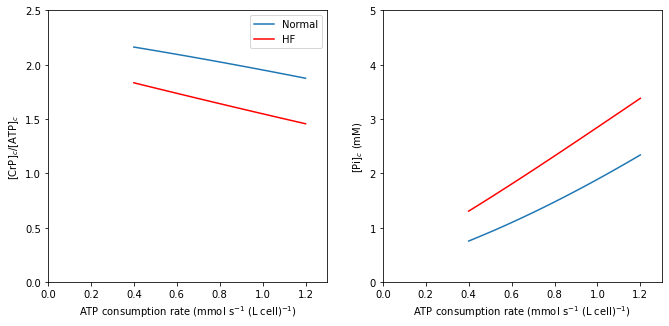

In [1]:
import numpy as np
import matplotlib.pyplot as plt

!pip install scipy
from scipy.integrate import solve_ivp

###### Constants defining metabolite pools ######
# Volume fractions and water space fractions
V_c = 0.6601       # cytosol volume fraction       # L cyto (L cell)**(-1)
V_m = 0.2882       # mitochondrial volume fraction # L mito (L cell)**(-1)
V_m2c = V_m / V_c  # mito to cyto volume ratio     # L mito (L cyto)**(-1)
W_c = 0.8425      # cytosol water space           # L cyto water (L cyto)**(-1)
W_m = 0.7238       # mitochondrial water space     # L mito water (L mito)**(-1)
W_x = 0.9*W_m      # matrix water space            # L matrix water (L mito)**(-1)
W_i = 0.1*W_m      # intermembrane water space     # L IM water (L mito)**(-1)

# Total pool concentrations
NAD_tot = 2.97e-3  # NAD+ and NADH conc            # mol (L matrix water)**(-1)
Q_tot   = 1.35e-3  # Q and QH2 conc                # mol (L matrix water)**(-1)
c_tot   = 2.7e-3   # cytochrome c ox and red conc  # mol (L IM water)**(-1)

# Membrane capacitance
Cm = 3.1e-3    # mol (V * L mito)^(-1)

###### Set fixed pH, cation concentrations, and O2 partial pressure ######
# pH
pH_x = 7.40
pH_c = 7.20

# K+ concentrations
K_x  = 100e-3      # mol (L matrix water)**(-1)
K_c  = 140e-3      # mol (L cyto water)**(-1)

# Mg2+ concentrations
Mg_x = 1.0e-3        # mol (L matrix water)**(-1)
Mg_c = 1.0e-3        # mol (L cyto water)**(-1)

# Oxygen partial pressure
PO2 = 25 # mmHg

conc = np.array([pH_x, pH_c, K_x, K_c, Mg_x, Mg_c, PO2])

###### Parameter vector ###### 
X_DH  = 0.1732
X_C1  = 1.0e4
X_C3  = 1.0e6
X_C4  = 0.0125
X_F   = 1.0e3
E_ANT = 0.325
E_PiC = 5.0e6
X_H   = 1.0e3
X_CK  = 1e7
X_AtC = 0.5e-3

activity_array = np.array([X_DH, X_C1, X_C3, X_C4, X_F, E_ANT, E_PiC, X_H, X_CK, X_AtC])

def dXdt(t, X, activity_array, solve_ode):
    # Unpack variables 
    DPsi, sumATP_x,sumADP_x, sumPi_x, NADH_x, QH2_x, cred_i, sumATP_c, sumADP_c, sumPi_c, CrP_c = X
    X_DH, X_C1, X_C3, X_C4, X_F, E_ANT, E_PiC, X_H, X_CK, X_AtC = activity_array

    # Hydrogen ion concentration
    H_x = 10**(-pH_x) # mol (L matrix water)**(-1)
    H_c = 10**(-pH_c) # mol (L cuvette water)**(-1)

    # Oxygen concentration
    a_3  = 1.74e-6   # oxygen solubility in cuvette   # mol (L matrix water * mmHg)**(-1)
    O2_x = a_3*PO2   # mol (L matrix water)**(-1)

    # Thermochemical constants
    R = 8.314          # J (mol K)**(-1)
    T = 37 + 273.15    # K
    F = 96485          # C mol**(-1)
    
    # Proton motive force parameters (dimensionless)
    n_F  = 8/3
    n_C1 = 4
    n_C3 = 2
    n_C4 = 4
    
    # Dissociation constants
    K_MgATP = 10**(-3.88)
    K_HATP  = 10**(-6.33)
    K_KATP  = 10**(-1.02)
    K_MgADP = 10**(-3.00)
    K_HADP  = 10**(-6.26)
    K_KADP  = 10**(-0.89)
    K_MgPi  = 10**(-1.66)
    K_HPi   = 10**(-6.62)
    K_KPi   = 10**(-0.42)

    ## Other concentrations computed from the state variables
    NAD_x = NAD_tot - NADH_x  ## mol (L matrix water)**(-1)
    Q_x   = Q_tot - QH2_x     ## mol (L matrix water)**(-1)
    cox_i = c_tot - cred_i    ## mol (L matrix water)**(-1)
    Cr_c  = Cr_tot_c - CrP_c  ## mol (L cyto water)**(-1) 
    
    ## Binding polynomials
    # Matrix species # mol (L mito water)**(-1)
    PATP_x = 1 + H_x/K_HATP + Mg_x/K_MgATP + K_x/K_KATP
    PADP_x = 1 + H_x/K_HADP + Mg_x/K_MgADP + K_x/K_KADP
    PPi_x  = 1 + H_x/K_HPi  + Mg_x/K_MgPi  + K_x/K_KPi
    
    # Cytosol species # mol (L cyto water)**(-1)
    PATP_c = 1 + H_c/K_HATP + Mg_c/K_MgATP + K_c/K_KATP
    PADP_c = 1 + H_c/K_HADP + Mg_c/K_MgADP + K_c/K_KADP
    PPi_c  = 1 + H_c/K_HPi  + Mg_c/K_MgPi  + K_c/K_KPi
    
    ## Unbound species
    # Matrix species
    ATP_x = sumATP_x / PATP_x # [ATP4-]_x
    ADP_x = sumADP_x / PADP_x # [ADP3-]_x
    Pi_x  = sumPi_x  / PPi_x  # [HPO42-]_x
    
    # Cytosol species
    ATP_c = sumATP_c / PATP_c # [ATP4-]_c
    ADP_c = sumADP_c / PADP_c # [ADP3-]_c
    Pi_c  = sumPi_c  / PPi_c  # [HPO42-]_c
    
    
    ###### NADH Dehydrogenase ######
    # Constants
    r      = 6.8385
    k_Pi1  = 4.659e-4    # mol (L matrix water)**(-1)
    k_Pi2  = 6.578e-4 # mol (L matrix water)**(-1)
    
    # Flux (mol (s * L mito)^(-1))  
    J_DH = X_DH * (r * NAD_x - NADH_x) * ((1 + sumPi_x / k_Pi1) / (1+sumPi_x / k_Pi2))

    ###### Complex I ######
    # NADH_x + Q_x + 5H+_x <-> NAD+_x + QH2_x + 4H+_i + 4dPsi
    
    # Gibbs energy (J mol**(-1))
    DrGo_C1 = -109680 
    DrGapp_C1 = DrGo_C1 - R * T * np.log(H_x) 
    
    # Apparent equilibrium constant
    Kapp_C1   = np.exp( -(DrGapp_C1 + n_C1 * F * DPsi) / (R * T)) * ((H_x / H_c)**n_C1)
    
    # Flux (mol (s * L mito)**(-1))
    J_C1 = X_C1 * (Kapp_C1 * NADH_x * Q_x - NAD_x * QH2_x)
    
    ###### Complex III ######
    # QH2_x + 2cuvetteC(ox)3+_i + 2H+_x <-> Q_x + 2cuvetteC(red)2+_i + 4H+_i + 2DPsi
    
    # Gibbs energy (J mol**(-1))
    DrGo_C3 = 46690 
    DrGapp_C3 = DrGo_C3 + 2 * R * T * np.log(H_c) 
    
    # Apparent equilibrium constant
    Kapp_C3   = np.exp(-(DrGapp_C3 + n_C3 * F * DPsi) / (R * T)) * (H_x / H_c)**n_C3 
    
    # Flux (mol (s * L mito)**(-1))
    J_C3 = X_C3 * (Kapp_C3 * cox_i**2 * QH2_x - cred_i**2 * Q_x)

    ###### Complex IV ######
    # 2 cytoC(red)2+_i + 0.5O2_x + 4H+_x <-> cytoC(ox)3+_x + H2O_x + 2H+_i + 2DPsi
    
    # Constant
    k_O2 = 1.2e-4      # mol (L matrix water)**(-1)
    
    # Gibbs energy (J mol**(-1))
    DrGo_C4 = -202160  # J mol**(-1)
    DrGapp_C4 = DrGo_C4 - 2 * R * T * np.log(H_c)
    
    # Apparent equilibrium constant
    Kapp_C4   = np.exp(-(DrGapp_C4 + n_C4 * F * DPsi) / (R * T)) * (H_x / H_c)**n_C4
    
    # Flux (mol (s * L mito)**(-1))
    J_C4 = X_C4 *(Kapp_C4**0.5 * cred_i * O2_x**0.25 - cox_i) * (1 / (1 + k_O2 / O2_x))

    ###### F0F1-ATPase ######
    # ADP3-_x + HPO42-_x + H+_x + n_A*H+_i <-> ATP4- + H2O + n_A*H+_x
    
    # Gibbs energy (J mol**(-1))
    DrGo_F = 4990 
    
    DrGapp_F = DrGo_F + R * T * np.log( H_x * PATP_x / (PADP_x * PPi_x))
    Kapp_F   = np.exp( (DrGapp_F + n_F * F * DPsi ) / (R * T)) * (H_c / H_x)**n_F
    
    # Flux (mol (s * L mito)**(-1))
    J_F = X_F * (Kapp_F * sumADP_x * sumPi_x - sumATP_x)
    
    ###### ANT ######
    # ATP4-_x + ADP3-_i <-> ATP4-_i + ADP3-_x
    
    # Constants
    del_D   = 0.0167
    del_T   = 0.0699
    k2o_ANT = 9.54/60      # s**(-1)
    k3o_ANT = 30.05/60     # s**(-1)
    K0o_D   = 38.89e-6     # mol (L cyto water)**(-1)
    K0o_T   = 56.05e-6     # mol (L cyto water)**(-1)
    A       = +0.2829
    B       = -0.2086
    C       = +0.2372
    
    phi = F * DPsi / (R * T)
    
    # Reaction rates
    k2_ANT = k2o_ANT * np.exp((A*(-3) + B*(-4) + C)*phi)
    k3_ANT = k3o_ANT * np.exp((A*(-4) + B*(-3) + C)*phi)
    
    # Dissociation constants
    K0_D = K0o_D * np.exp(3*del_D*phi)
    K0_T = K0o_T * np.exp(4*del_T*phi)
    
    q     = k3_ANT * K0_D * np.exp(phi) / (k2_ANT * K0_T)
    term1 = k2_ANT * ATP_x * ADP_c * q / K0_D
    term2 = k3_ANT * ADP_x * ATP_c / K0_T
    num   = term1 - term2
    den   = (1 + ATP_c/K0_T + ADP_c/K0_D) * (ADP_x + ATP_x * q)
    
    # Flux
    J_ANT = E_ANT * num / den
    
    ###### H+-PI2 cotransporter ######
    # H2PO42-_x + H+_x = H2PO42-_c + H+_c
    
    # Constant
    k_PiC = 1.61e-3  # mol (L cell)**(-1)
    
    # H2P04- species
    HPi_c = Pi_c * (H_c / K_HPi)
    HPi_x = Pi_x * (H_x / K_HPi)
    
    # Flux (mol (s * L mito)**(-1))
    J_PiC = E_PiC * (H_c * HPi_c - H_x * HPi_x) / (k_PiC + HPi_c)

    ###### H+ leak ######
    
    # Flux (mol (s * L mito)**(-1))
    J_H = X_H * (H_c * np.exp(phi/2) - H_x * np.exp(-phi/2))
    
    ###### ATPase ######
    # ATP4- + H2O = ADP3- + PI2- + H+
    
    #Flux (mol (s * L cyto)**(-1))
    J_AtC = X_AtC / V_c

    ###### Creatine kinase reaction ######
    # ADP3- + CrP2- + H+ = ATP4- + Cr  
    
    # Equilibrium constant (dimensionless)        
    Keq_CK  = 3.5e8
    
    # Gibbs energy (J mol**(-1))
    DrGo_CK = - R * T * np.log(Keq_CK)
    DrGapp_CK = DrGo_CK + R * T * np.log(PADP_c / (PATP_c * H_c))  
    
    # Apparent equilibrium constant 
    Kapp_CK   = np.exp(-DrGapp_CK / (R * T))
    
    # Flux (mol (s * L cyto)^(-1))   
    J_CK = X_CK * (Kapp_CK * ADP_c * CrP_c - ATP_c * Cr_c)
    
    ###### Differential equations (equation 26) ######
    # Membrane potential
    dDPsi = (n_C1 * J_C1 + n_C3 * J_C3 + n_C4 * J_C4 - n_F * J_F - J_ANT - J_H) / Cm

    # Matrix species
    dATP_x  = (J_F  - J_ANT) / W_x
    dADP_x  = (-J_F + J_ANT) / W_x
    dPi_x   = (-J_F + J_PiC) / W_x
    dNADH_x = (J_DH - J_C1)  / W_x
    dQH2_x  = (J_C1 - J_C3)  / W_x
    
    # IM space species
    dcred_i = 2 * (J_C3 - J_C4) / W_i
    
    # Cytosol species
    dATP_c = ( V_m2c * J_ANT - J_AtC + J_CK ) / W_c
    dADP_c = (-V_m2c * J_ANT + J_AtC - J_CK ) / W_c
    dPi_c  = (-V_m2c * J_PiC + J_AtC) / W_c
    dCrP_c = -J_CK / W_c
    
    dX = [dDPsi, dATP_x, dADP_x, dPi_x, dNADH_x, dQH2_x, dcred_i, dATP_c, dADP_c, dPi_c, dCrP_c]
    
    # Calculate state-dependent quantities after model is solved.
    if solve_ode == 1:
        return dX
    else:
        J = np.array([PATP_x, PADP_x, PPi_x, PATP_c, PADP_c, PPi_c, J_DH, J_C1, J_C3, J_C4, J_F, J_ANT, J_PiC, J_CK])
        return dX, J

###### Initial Conditions ######
# Membrane Potential
Psi_0 = 175/1000      # Volts

# Matrix species
sumATP_x_0 = 0.5e-3  # mol (L matrix water)^(-1)
sumADP_x_0 = 9.5e-3  # mol (L matrix water)^(-1)
sumPi_x_0 = 0.3e-3   # mol (L matrix water)^(-1)
NADH_x_0 = 2/3 * NAD_tot  # mol (L matrix water)^(-1)
QH2_x_0 = 0.1 * Q_tot   # mol (L matrix water)^(-1)

# IMS species
cred_i_0 = 0.1 * c_tot

# Cytoplasmic species
#sumATP_c_0 = 9.95e-3  # mol (L cyto water)^(-1)
sumADP_c_0 = 0.05e-3  # mol s(L cyto water)^(-1)
#sumPi_c_0 = 5.0e-3  # mol (L cyto water)^(-1)

###### Healthy normal case ######
TAN = 0.0076 #(M per liter cell)
TEP = 0.0275  #(M per liter cell)
Cr_tot  = 0.040    #(M per liter cell)
     
sumATP_c_0 = (TAN - V_m*W_x*(sumATP_x_0 + sumADP_x_0))/(V_c*W_c+V_m*W_i) - sumADP_c_0
Cr_tot_c   = Cr_tot / (V_c * W_c) # convert to mol (L cyto water)^(-1)
CrP_c_0    = .3 * Cr_tot_c  # mol (L cyto water)^(-1)
sumPi_c_0  = (TEP-V_m*W_x*(sumATP_x_0 + sumADP_x_0 + sumPi_x_0 ))/(V_c*W_c+V_m*W_i) - 2*sumATP_c_0 - sumADP_c_0 - CrP_c_0 

X_0 = np.array([Psi_0, sumATP_x_0, sumADP_x_0, sumPi_x_0, NADH_x_0, QH2_x_0, cred_i_0, sumATP_c_0, sumADP_c_0, sumPi_c_0, CrP_c_0]) 

# range of ATP consumption rates
X_AtC = np.linspace(0.4e-3,1.2e-3, 60)   # Increase max hydrolysis to find apparent Km.
steady_state = np.zeros((len(X_AtC), len(X_0)))
JO2 = np.zeros(len(X_AtC))
tspan = np.array([0,10])
# looping through different ATP consumptions states
for i in range(len(X_AtC)):
   activity_array = np.array([X_DH, X_C1, X_C3, X_C4, X_F, E_ANT, E_PiC, X_H, X_CK, X_AtC[i]])
   # run for long time to acheive steady-state
   steady_state_temp_results = solve_ivp(dXdt, tspan, X_0, method = 'Radau', args=(activity_array,1,),max_step = 0.1).y[:,-1]
   steady_state[i] = steady_state_temp_results
   
DPsi, sumATP_x, sumADP_x, sumPi_x, NADH_x, QH2_x, cred_i, sumATP_c, sumADP_c, sumPi_c, CrP_c = steady_state.T

fig, ax = plt.subplots(1,2, figsize = (11,5))

## Plot normal case
# CrP/ATP ratio
ax[0].plot(X_AtC * 1000, CrP_c * (V_c * W_c)/(sumATP_x * V_m * W_x+ sumATP_c *(V_c * W_c + V_m * W_i)),label = 'Normal')      # 

# Pi_c
ax[1].plot(X_AtC * 1000, sumPi_c * 1000,label = 'Normal')     # Pi_c 

###### Heart Failure (HF/TAC) case ######
#Mean TAC pools
TAN = 0.006976 #(M per liter cell)
TEP = 0.02411  #(M per liter cell)
Cr_tot =  0.02303 #(M per liter cell)
    
sumATP_c_0 = (TAN - V_m*W_x*(sumATP_x_0 + sumADP_x_0))/(V_c*W_c+V_m*W_i) - sumADP_c_0
Cr_tot_c   = Cr_tot / (V_c * W_c) # convert to mol (L cyto water)^(-1)
CrP_c_0    = .3 * Cr_tot_c  # mol (L cyto water)^(-1)
sumPi_c_0  = (TEP-V_m*W_x*(sumATP_x_0 + sumADP_x_0 + sumPi_x_0 ))/(V_c*W_c+V_m*W_i) - 2*sumATP_c_0 - sumADP_c_0 - CrP_c_0 

X_0 = np.array([Psi_0, sumATP_x_0, sumADP_x_0, sumPi_x_0, NADH_x_0, QH2_x_0, cred_i_0, sumATP_c_0, sumADP_c_0, sumPi_c_0, CrP_c_0]) 

# range of ATP consumption rates
steady_stateHF = np.zeros((len(X_AtC), len(X_0)))
# looping through different ATP consumptions states
for i in range(len(X_AtC)):
   activity_array = np.array([X_DH, X_C1, X_C3, X_C4, X_F, E_ANT, E_PiC, X_H, X_CK, X_AtC[i]])
   # run for long time to acheive steady-state
   steady_state_temp_resultsHF = solve_ivp(dXdt, tspan, X_0, method = 'Radau', args=(activity_array,1,),max_step = 0.1).y[:,-1]
   steady_stateHF[i] = steady_state_temp_resultsHF
  
DPsi, sumATP_x, sumADP_x, sumPi_x, NADH_x, QH2_x, cred_i, sumATP_c, sumADP_c, sumPi_c, CrP_c = steady_stateHF.T

## Plot figures
# CrP/ATP ratio
ax[0].plot(X_AtC * 1000, CrP_c * (V_c * W_c)/(sumATP_x * V_m * W_x+ sumATP_c *(V_c * W_c + V_m * W_i)),'red',label = 'HF')       
ax[0].set_ylabel('[CrP]$_c$/[ATP]$_c$')
ax[0].set_xlabel('ATP consumption rate (mmol s$^{-1}$ (L cell)$^{-1}$)')
ax[0].set_xlim([0,1.3])
ax[0].set_ylim([0.0,2.5])
ax[0].legend()

# Pi_c
ax[1].plot(X_AtC * 1000, sumPi_c * 1000, 'red',label = 'HF')     
ax[1].set_ylabel('[Pi]$_c$ (mM)')
ax[1].set_xlabel('ATP consumption rate (mmol s$^{-1}$ (L cell)$^{-1}$)')
ax[1].set_xlim([0,1.3])
ax[1].set_ylim([0,5])
plt.show()





**Figure 10:** Simulation of respiratory control in vivo using the system in Equation {eq}`system-invivo` for (a) the creatine phosphate to ATP ratio ($[\text{CrP}]_c/[\text{ATP}]_c$) and (b) cytosolic Pi concentration ($[\text{Pi}]_c$).

Simulations of the normal case (blue lines) show that over the physiological range of ATP demand and oxygen consumption, the CrP/ATP ratio in the myocardium decreases from a value of $2.2$ at rest to $2.0$ in exercise, while the cytosolic phosphate concentration increases from approximately $ 0.75 \ \text{mM}$ at rest to $2.3 \ \text{mM}$ in exercise. These model predictions are remarkably close to experiment observations, given the relative simplicity of this model. Consistent with previous analyses, when the metabolite pool levels are changed to represent heart failure conditions (red lines), the CrP/ATP ratio decreases compared and the inorganic phosphate concentration is predicted to increase compared to physiological levels.